# Week 13 – Review of Multiple Linear Regression and Logistic Regression

- Find the best model given a dependent variable
- Describe the equation of the models
- Evaluate the model (R-squared)
- Create the confusion matrix (logistic regression)


## Libraries

In [201]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Linear Regression

In [202]:
# load Auto.csv dataset
auto = pd.read_csv('Auto.csv', na_values='?').dropna()

In [203]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### 1 - Using the correlation matrix and the p-values, find the best linear regression model.

### 2 -  Which variables would be removed from the model, and why?

### 3 - Consider the origin column as a categorical variable where 1 = USA, 2 = Europe, 3 = Japan. Which origin has the greatest impact on fuel consumption (mpg)?

### 4 - What is the equation of the best model found?

In [204]:
#drop the 'name' column
auto = auto.drop(columns=['name'])

In [205]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


In [206]:
#create one-hot encoding for 'origin' column with 0/1 values considering
auto = pd.get_dummies(auto, columns=['origin'], prefix=['origin'], drop_first=True, dtype=int)


In [207]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,0,0
393,44.0,4,97.0,52.0,2130,24.6,82,1,0
394,32.0,4,135.0,84.0,2295,11.6,82,0,0
395,28.0,4,120.0,79.0,2625,18.6,82,0,0


In [208]:
 #rename columns considering 1 = EUA, 2 = Europe, 3 = Japan
auto = auto.rename(columns={'origin_2': 'origin_Europe', 'origin_3': 'origin_Japan'})

In [209]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,0,0
393,44.0,4,97.0,52.0,2130,24.6,82,1,0
394,32.0,4,135.0,84.0,2295,11.6,82,0,0
395,28.0,4,120.0,79.0,2625,18.6,82,0,0


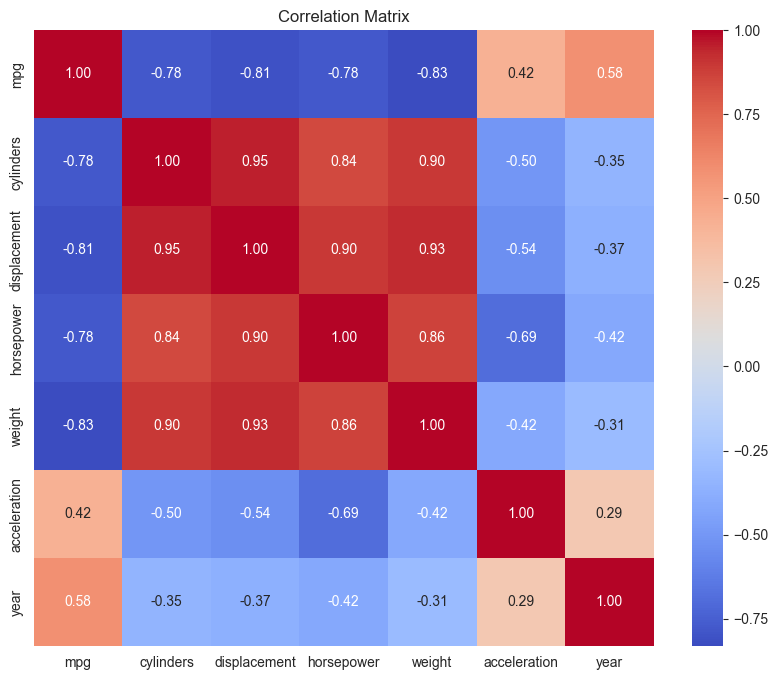

In [210]:
#create a correlation matrix without categorial variables
corr_matrix = auto.drop(columns=['origin_Europe', 'origin_Japan']).corr()
#print the correlation matrix with heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [211]:
#consider 'mpg' as the dependent variable and the rest as independent variables
X = auto.drop(columns=['mpg'])
y = auto['mpg']


In [212]:
#create linear regression model using statsmodels
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()


In [213]:
#print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          1.79e-139
Time:                        18:53:43   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.9546      4.677     -3.839

In [214]:
#print the list of, in module has more corelation with 'mpg'
correlations = corr_matrix['mpg'].sort_values(ascending=False)
print(correlations)


mpg             1.000000
year            0.580541
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64


In [215]:
#considering correlation matrix:
#maybe remove acceleration and year

In [216]:
#considering p-values:
#remove cylinder, hoursepower and aceleration

In [217]:
#create a model without acceleration
X_reduced = X.drop(columns=['acceleration'])
model_reduced = sm.OLS(y, X_reduced).fit()

In [218]:
#print summary of the reduced model
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     256.7
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          1.49e-140
Time:                        18:53:43   Log-Likelihood:                -1020.8
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     384   BIC:                             2089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.3323      4.219     -3.871

In [219]:
#now remove cylinder
X_reduced2 = X_reduced.drop(columns=['cylinders'])
model_reduced2 = sm.OLS(y, X_reduced2).fit()


In [220]:
print(model_reduced2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     297.9
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          2.80e-141
Time:                        18:53:43   Log-Likelihood:                -1022.0
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     385   BIC:                             2086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.5036      4.160     -4.207

In [221]:
#both reductions has no impact in R-squared. This means that acceleration and cylinders
#are not significant to predict 'mpg' in this dataset.

In [222]:
#remove both categorial variables 'origin_Europe' and 'origin_Japan'
X_final = X_reduced2.drop(columns=['origin_Europe', 'origin_Japan'])
model_final = sm.OLS(y, X_final).fit()

In [223]:
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     408.1
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          2.24e-137
Time:                        18:53:43   Log-Likelihood:                -1037.4
No. Observations:                 392   AIC:                             2085.
Df Residuals:                     387   BIC:                             2105.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.6110      4.198     -3.242   

In [224]:
#so both categorial variables has a impact in R-squared, keep them in the model.

In [225]:
#which origin has more impact in 'mpg'?
#'origin_Japan' has more impact than 'origin_Europe' according to the coefficients

In [226]:
#how about usa origin?
#'origin_Europe' and 'origin_Japan' are both positive considering origin_usa as baseline.
#This means that cars from Europe and Japan has more 'mpg' than cars from USA

In [227]:
#mpg = -17.5036 + 0.0155*displacement -0.0230*horsepower -0.0066*weight + 0.7749*year + 2.5958*origin_Europe + 2.7722*origin_Japan

## Part 2: Logistic Regression

In [228]:
#load StudentPerformance.csv dataset
student = pd.read_csv('StudentPerformance.csv')
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### 1 - Considering 'Performance Index' as the dependent variable, create a new column 'approved' where students with Performance Index >= 60 are considered approved (1) and the rest not approved (0). Drop the 'Performance Index' column afterwards.

### 2 - Considering 'approved' as the dependent variable, find the best logistic regression model.

### 3 - Separate the dataset into train and test sets (70% train, 30% test). Calculate the accuracy of the model on the test set.

### 4 - Create the confusion matrix for the test set predictions.

In [229]:
len(student)

10000

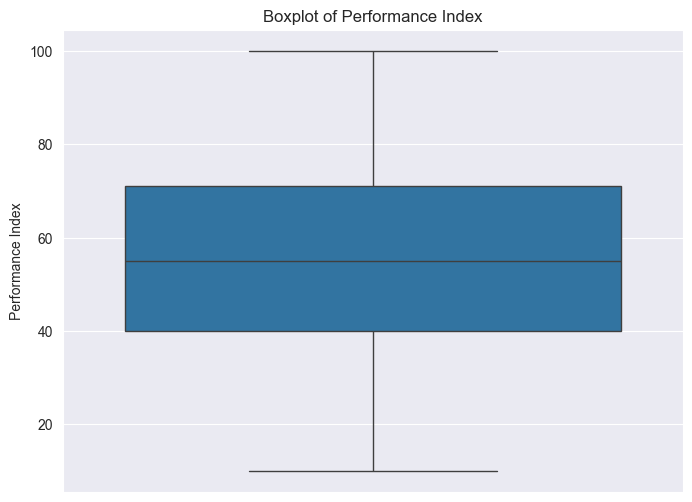

In [230]:
#create a boxplot of Performance Index
plt.figure(figsize=(8, 6))
sns.boxplot(y=student['Performance Index'])
plt.title('Boxplot of Performance Index')
plt.show()

In [231]:
#Considerer approved students those with Performance Index >= 60 create a new column 'approved' with 1 for approved and 0 for not approved
student['approved'] = np.where(student['Performance Index'] >= 60, 1, 0)

In [232]:
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,approved
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,1
2,8,51,Yes,7,2,45.0,0
3,5,52,Yes,5,2,36.0,0
4,7,75,No,8,5,66.0,1
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,0
9996,7,64,Yes,8,5,58.0,0
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1


In [233]:
#drop 'Performance Index' column
student = student.drop(columns=['Performance Index'])

In [234]:
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,approved
0,7,99,Yes,9,1,1
1,4,82,No,4,2,1
2,8,51,Yes,7,2,0
3,5,52,Yes,5,2,0
4,7,75,No,8,5,1
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,0
9996,7,64,Yes,8,5,0
9997,6,83,Yes,8,5,1
9998,9,97,Yes,7,0,1


In [235]:
# considering approved as the dependent variable, find the best logistic regression model.
X = student.drop(columns=['approved'])
y = student['approved']


In [239]:
#convert Extracurricular Activities into binary variable
X['Extracurricular Activities'] = np.where(X['Extracurricular Activities'] == 'Yes', 1, 0)

In [240]:
#create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [241]:
#add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [242]:
#run logistic regression model
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.055754
         Iterations 12


In [243]:
#calculate accuracy on test set
y_pred_prob = logit_model.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9723


In [244]:
#create confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     0     1
Actual               
0          1691    30
1            53  1226
